<a href="https://colab.research.google.com/github/pavankumarallu/BankNifty_Trade_Analysis/blob/main/BankNifty_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_excel('/content/BankNiftyFutures_Data5Min.xlsx')
df2 = pd.read_excel('/content/BankNiftyFutures_Data5Min.xlsx')

In [4]:
df1.head()

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [5]:
df2['Date'] = df2['Date'].astype(str)
df2['Time'] = df2['Time'].astype(str)
df2['new_Time'] = df2['Date']+" "+df2['Time']
df2['new_Time']
df3 = df2

In [7]:
df3

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,new_Time
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,2015-01-01 09:20:00
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,2015-01-01 09:25:00
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,2015-01-01 09:30:00
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,2015-01-01 09:35:00
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,2015-01-01 09:40:00
...,...,...,...,...,...,...,...,...,...,...,...
91732,BANKNIFTY_F1,2019-12-31,20191231,15:06:00,32398.1992,32400.0000,32382.8008,32389.0000,18900,2019,2019-12-31 15:06:00
91733,BANKNIFTY_F1,2019-12-31,20191231,15:11:00,32390.3496,32390.4004,32382.0000,32382.0000,26820,2019,2019-12-31 15:11:00
91734,BANKNIFTY_F1,2019-12-31,20191231,15:16:00,32383.5000,32386.8008,32320.0000,32320.8008,128780,2019,2019-12-31 15:16:00
91735,BANKNIFTY_F1,2019-12-31,20191231,15:21:00,32327.8008,32392.6992,32324.4492,32371.6992,80260,2019,2019-12-31 15:21:00


In [8]:
from datetime import datetime
def converttodate(l):
  dateT = []
  for strdate in l:
    date_time_obj = datetime.strptime(strdate, '%Y-%m-%d %H:%M:%S')
    dateT.append(date_time_obj)

  return dateT


l = df3['new_Time'].values.tolist()
l = converttodate(l)
df3['new_time_2'] = l
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91737 entries, 0 to 91736
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ticker             91737 non-null  object        
 1   Date               91737 non-null  object        
 2   Final Date format  91737 non-null  int64         
 3   Time               91737 non-null  object        
 4   Open 5             91737 non-null  float64       
 5   High 5             91737 non-null  float64       
 6   Low 5              91737 non-null  float64       
 7   Close 5            91737 non-null  float64       
 8   Volume 5           91737 non-null  int64         
 9   Year               91737 non-null  int64         
 10  new_Time           91737 non-null  object        
 11  new_time_2         91737 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 8.4+ MB


In [9]:
df3 = df3.drop(['new_Time'],axis=1)

In [10]:
df4 = df3

In [11]:
df4.head(10)

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,new_time_2
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,2015-01-01 09:20:00
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,2015-01-01 09:25:00
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,2015-01-01 09:30:00
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,2015-01-01 09:35:00
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,2015-01-01 09:40:00
5,BANKNIFTY_F1,2015-01-01,20150101,09:45:00,18803.9492,18829.9004,18800.0000,18821.0000,26550,2015,2015-01-01 09:45:00
6,BANKNIFTY_F1,2015-01-01,20150101,09:50:00,18821.0000,18839.0508,18820.0000,18837.0000,22275,2015,2015-01-01 09:50:00
7,BANKNIFTY_F1,2015-01-01,20150101,09:55:00,18837.0000,18850.0000,18830.5508,18846.8008,30750,2015,2015-01-01 09:55:00
8,BANKNIFTY_F1,2015-01-01,20150101,10:00:00,18846.9004,18846.9004,18830.0000,18838.9492,13800,2015,2015-01-01 10:00:00
9,BANKNIFTY_F1,2015-01-01,20150101,10:05:00,18835.0508,18858.5996,18835.0508,18853.8008,19700,2015,2015-01-01 10:05:00


# **Backtesting**

In [12]:
backtest_data = df4
backtest_data = backtest_data.drop(['Ticker','Date','Time','Year','Final Date format'],axis = 1)

In [13]:
backtest_data = backtest_data.rename(columns={'Open 5':'Open','Close 5':'Close','High 5':'High','Low 5':'Low','Volume 5':'Volume'})
backtest_data.head()

,Open,High,Low,Close,Volume,new_time_2
0,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015-01-01 09:20:00
1,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015-01-01 09:25:00
2,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015-01-01 09:30:00
3,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015-01-01 09:35:00
4,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015-01-01 09:40:00


In [14]:
backtest_data = backtest_data.set_index('new_time_2')

In [15]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

bt = Backtest(data = backtest_data, strategy = SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:104: UserWarning: Data contains too many candlesticks to plot; downsampling to '8H'. See `Backtest.plot(resample=...)`
  warnings.warn(f"Data contains too many candlesticks to plot; downsampling to {freq!r}. "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Superimposed OHLC plot matches the orig

In [16]:

df3

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,new_time_2
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,2015-01-01 09:20:00
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,2015-01-01 09:25:00
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,2015-01-01 09:30:00
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,2015-01-01 09:35:00
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,2015-01-01 09:40:00
...,...,...,...,...,...,...,...,...,...,...,...
91732,BANKNIFTY_F1,2019-12-31,20191231,15:06:00,32398.1992,32400.0000,32382.8008,32389.0000,18900,2019,2019-12-31 15:06:00
91733,BANKNIFTY_F1,2019-12-31,20191231,15:11:00,32390.3496,32390.4004,32382.0000,32382.0000,26820,2019,2019-12-31 15:11:00
91734,BANKNIFTY_F1,2019-12-31,20191231,15:16:00,32383.5000,32386.8008,32320.0000,32320.8008,128780,2019,2019-12-31 15:16:00
91735,BANKNIFTY_F1,2019-12-31,20191231,15:21:00,32327.8008,32392.6992,32324.4492,32371.6992,80260,2019,2019-12-31 15:21:00


## **Resampling the Data to 15 Minute time Frame**

In [17]:
df5 = df4.set_index('new_time_2').resample('15T', closed = 'right').sum()
df6 = pd.DataFrame(df5['Volume 5'])
df5 = df4.set_index('new_time_2').resample('15T', closed = 'right').max()
df6['high 5'] = pd.DataFrame(df5['High 5'])
df5 = df4.set_index('new_time_2').resample('15T', closed = 'right').min()
df6['Low 5'] = pd.DataFrame(df5['Low 5'])
df5 = df4.set_index('new_time_2').resample('15T', closed = 'right').first()
df6['Open 5'] = pd.DataFrame(df5['Open 5'])
df5 = df4.set_index('new_time_2').resample('15T', closed = 'right').last()
df6['Close 5'] = pd.DataFrame(df5['Close 5'])

In [18]:
df7 = df6
df7 = df7.dropna()
df7 = df7.reset_index()

In [19]:
df7.head(20)

,new_time_2,Volume 5,high 5,Low 5,Open 5,Close 5
0,2015-01-01 09:15:00,152750,18867.9492,18793.0000,18861.3496,18826.0996
1,2015-01-01 09:30:00,104675,18829.9004,18775.0000,18825.0508,18821.0000
2,2015-01-01 09:45:00,66825,18850.0000,18820.0000,18821.0000,18838.9492
3,2015-01-01 10:00:00,49100,18858.5996,18830.6504,18835.0508,18836.4004
4,2015-01-01 10:15:00,16600,18848.0000,18828.5996,18835.6992,18830.0000
5,2015-01-01 10:30:00,14175,18841.1504,18825.0000,18830.0000,18829.1992
6,2015-01-01 10:45:00,15650,18846.2500,18830.0996,18830.1504,18843.2500
7,2015-01-01 11:00:00,18675,18848.6992,18832.0000,18843.5000,18840.0000
8,2015-01-01 11:15:00,87525,18889.9004,18840.0000,18840.0000,18872.0000
9,2015-01-01 11:30:00,18075,18874.0000,18851.9492,18871.0508,18869.0000


In [20]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df7['new_time_2'],
                open=df7['Open 5'], high=df7['high 5'],
                low=df7['Low 5'], close=df7['Close 5'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## **Calculating VWAP**

In [22]:
def calculateVwap(data):
    data['TP'] = (data['high 5']+data['Low 5']+data['Close 5'])/3.0
    data['TradedValue']  = data['TP']*data['Volume 5']
    data['CumVolume'] = data['Volume 5'].cumsum()
    data['CumTradedValue'] = data['TradedValue'].cumsum()
    data['VWAP'] = data['CumTradedValue'] /data['CumVolume']
    return data


In [23]:
df8 = df7

In [24]:
df8 = df8.groupby('new_time_2').apply(calculateVwap)

In [25]:
df8

,new_time_2,Volume 5,high 5,Low 5,Open 5,Close 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01 09:15:00,152750,18867.9492,18793.0000,18861.3496,18826.0996,18829.016267,2.876132e+09,152750,2.876132e+09,18829.016267
1,2015-01-01 09:30:00,104675,18829.9004,18775.0000,18825.0508,18821.0000,18808.633467,1.968794e+09,104675,1.968794e+09,18808.633467
2,2015-01-01 09:45:00,66825,18850.0000,18820.0000,18821.0000,18838.9492,18836.316400,1.258737e+09,66825,1.258737e+09,18836.316400
3,2015-01-01 10:00:00,49100,18858.5996,18830.6504,18835.0508,18836.4004,18841.883467,9.251365e+08,49100,9.251365e+08,18841.883467
4,2015-01-01 10:15:00,16600,18848.0000,18828.5996,18835.6992,18830.0000,18835.533200,3.126699e+08,16600,3.126699e+08,18835.533200
...,...,...,...,...,...,...,...,...,...,...,...
30718,2019-12-31 14:15:00,96960,32450.0000,32384.0000,32444.0000,32409.8496,32414.616533,3.142921e+09,96960,3.142921e+09,32414.616533
30719,2019-12-31 14:30:00,56520,32459.0000,32401.1992,32409.8496,32426.0996,32428.766267,1.832874e+09,56520,1.832874e+09,32428.766267
30720,2019-12-31 14:45:00,114820,32439.9492,32374.3008,32426.0996,32382.9492,32399.066400,3.720061e+09,114820,3.720061e+09,32399.066400
30721,2019-12-31 15:00:00,95220,32407.6992,32376.6504,32380.6504,32382.0000,32388.783200,3.084060e+09,95220,3.084060e+09,32388.783200


## **Calculate the overall profit and loss** 

In [26]:
print("Profit : ",(df8['Close 5'][len(df8)-1]-df8['Open 5'][0]))
print("Profit % : ",str(((df8['Close 5'][len(df8)-1]-df8['Open 5'][0])/df8['Open 5'][0])*100) + " %")

Profit :  13518.550799999997
Profit % :  71.67329531922782 %


## **Resampling the data to Day wise data**

In [27]:
df5 = df4.set_index('new_time_2').resample('1440T', closed = 'right').sum()
df9 = pd.DataFrame(df5['Volume 5'])
df5 = df4.set_index('new_time_2').resample('1440T', closed = 'right').max()
df9['high 5'] = pd.DataFrame(df5['High 5'])
df5 = df4.set_index('new_time_2').resample('1440T', closed = 'right').min()
df9['Low 5'] = pd.DataFrame(df5['Low 5'])
df5 = df4.set_index('new_time_2').resample('1440T', closed = 'right').first()
df9['Open 5'] = pd.DataFrame(df5['Open 5'])
df5 = df4.set_index('new_time_2').resample('1440T', closed = 'right').last()
df9['Close 5'] = pd.DataFrame(df5['Close 5'])

In [28]:
df9.dropna(axis=0,inplace=True)
df9.reset_index(inplace=True)

In [29]:
df9 = df9.groupby('new_time_2').apply(calculateVwap)

In [30]:
df9['Profit/Loss_Values'] = (df9['Close 5'] - df9['Open 5'])

In [31]:
df9

,new_time_2,Volume 5,high 5,Low 5,Open 5,Close 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP,Profit/Loss_Values
0,2015-01-01,1075025,18929.9492,18775.0000,18861.3496,18900.0000,18868.316400,2.028391e+10,1075025,2.028391e+10,18868.316400,38.6504
1,2015-01-02,2685450,19284.0000,18898.0000,18899.8008,19231.0000,19137.666667,5.139325e+10,2685450,5.139325e+10,19137.666667,331.1992
2,2015-01-05,2150525,19281.0000,19110.0000,19235.0000,19154.0000,19181.666667,4.125065e+10,2150525,4.125065e+10,19181.666667,-81.0000
3,2015-01-06,4512350,19154.0000,18475.9492,19154.0000,18508.0000,18712.649733,8.443803e+10,4512350,8.443803e+10,18712.649733,-646.0000
4,2015-01-07,3834100,18592.0000,18306.0000,18506.0000,18449.3496,18449.116533,7.073576e+10,3834100,7.073576e+10,18449.116533,-56.6504
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2019-12-24,1566820,32384.0000,32270.4492,32342.5508,32306.5000,32320.316400,5.064012e+10,1566820,5.064012e+10,32320.316400,-36.0508
1222,2019-12-26,2351680,32339.0000,31945.0000,32306.5000,31999.5996,32094.533200,7.547607e+10,2351680,7.547607e+10,32094.533200,-306.9004
1223,2019-12-27,2483400,32633.7500,31996.5000,31999.3496,32613.0000,32414.416667,8.049796e+10,2483400,8.049796e+10,32414.416667,613.6504
1224,2019-12-30,2588880,32773.8516,32431.0000,32613.0000,32552.9004,32585.917333,8.436103e+10,2588880,8.436103e+10,32585.917333,-60.0996


In [32]:
l = df9['Profit/Loss_Values'].values.tolist()
profit_loss = []
for i in l:
  if i<=0:
    profit_loss.append("Loss")
  else:
    profit_loss.append("Profit")
df9['Profit/Loss'] = profit_loss

In [51]:
df9['Profit/Loss_Percentage'] = ((abs(df9['Close 5'] - df9['Open 5']))/df9['Open 5'])*100

## **Segregate the Profit and Loss day wise**

In [52]:
df9

,new_time_2,Volume 5,high 5,Low 5,Open 5,Close 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP,Profit/Loss_Values,Profit/Loss,Profit/Loss_Percentage
0,2015-01-01,1075025,18929.9492,18775.0000,18861.3496,18900.0000,18868.316400,2.028391e+10,1075025,2.028391e+10,18868.316400,38.6504,Profit,0.204919
1,2015-01-02,2685450,19284.0000,18898.0000,18899.8008,19231.0000,19137.666667,5.139325e+10,2685450,5.139325e+10,19137.666667,331.1992,Profit,1.752395
2,2015-01-05,2150525,19281.0000,19110.0000,19235.0000,19154.0000,19181.666667,4.125065e+10,2150525,4.125065e+10,19181.666667,-81.0000,Loss,0.421107
3,2015-01-06,4512350,19154.0000,18475.9492,19154.0000,18508.0000,18712.649733,8.443803e+10,4512350,8.443803e+10,18712.649733,-646.0000,Loss,3.372664
4,2015-01-07,3834100,18592.0000,18306.0000,18506.0000,18449.3496,18449.116533,7.073576e+10,3834100,7.073576e+10,18449.116533,-56.6504,Loss,0.306119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,2019-12-24,1566820,32384.0000,32270.4492,32342.5508,32306.5000,32320.316400,5.064012e+10,1566820,5.064012e+10,32320.316400,-36.0508,Loss,0.111466
1222,2019-12-26,2351680,32339.0000,31945.0000,32306.5000,31999.5996,32094.533200,7.547607e+10,2351680,7.547607e+10,32094.533200,-306.9004,Loss,0.949965
1223,2019-12-27,2483400,32633.7500,31996.5000,31999.3496,32613.0000,32414.416667,8.049796e+10,2483400,8.049796e+10,32414.416667,613.6504,Profit,1.917696
1224,2019-12-30,2588880,32773.8516,32431.0000,32613.0000,32552.9004,32585.917333,8.436103e+10,2588880,8.436103e+10,32585.917333,-60.0996,Loss,0.184281


In [57]:
df9.to_excel("Daily data.xlsx")

# **Resampling to Yearwise data**

In [36]:
df5 = df4.set_index('new_time_2').resample('Y', closed = 'right').sum()
df10 = pd.DataFrame(df5['Volume 5'])
df5 = df4.set_index('new_time_2').resample('Y', closed = 'right').max()
df10['high 5'] = pd.DataFrame(df5['High 5'])
df5 = df4.set_index('new_time_2').resample('Y', closed = 'right').min()
df10['Low 5'] = pd.DataFrame(df5['Low 5'])
df5 = df4.set_index('new_time_2').resample('Y', closed = 'right').first()
df10['Open 5'] = pd.DataFrame(df5['Open 5'])
df5 = df4.set_index('new_time_2').resample('Y', closed = 'right').last()
df10['Close 5'] = pd.DataFrame(df5['Close 5'])

In [37]:
df10 = df10.groupby('new_time_2').apply(calculateVwap)

In [38]:
df10['Profit/Loss_Values'] = (df10['Close 5'] - df10['Open 5'])

In [39]:
l = df10['Profit/Loss_Values'].values.tolist()
profit_loss = []
for i in l:
  if i<=0:
    profit_loss.append("Loss")
  else:
    profit_loss.append("Profit")
df10['Profit/Loss'] = profit_loss

In [40]:
df10.reset_index(inplace=True)

In [54]:
df10['Profit/Loss_Percentage'] = ((df10['Close 5'] - df10['Open 5'])/df10['Open 5'])*100

## **Segregate the Profit and Loss Year wise**

In [55]:
df10

,new_time_2,Volume 5,high 5,Low 5,Open 5,Close 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP,Profit/Loss_Values,Profit/Loss,Profit/Loss_Percentage
0,2015-12-31,829540772,20934.0000,15793.0498,18861.3496,16918.5000,17881.849933,1.483372e+13,829540772,1.483372e+13,17881.849933,-1942.8496,Loss,-10.300692
1,2016-12-31,806017270,20649.4492,13406.4004,16918.0000,18175.9492,17410.599600,1.403324e+13,806017270,1.403324e+13,17410.599600,1257.9492,Profit,7.435567
2,2017-12-31,673591560,26200.0000,17855.5000,18210.0996,25580.0000,23211.833333,1.563530e+13,673591560,1.563530e+13,23211.833333,7369.9004,Profit,40.471500
3,2018-12-31,1516767560,28408.8008,23631.1992,25570.0000,27318.3496,26452.783200,4.012272e+13,1516767560,4.012272e+13,26452.783200,1748.3496,Profit,6.837503
4,2019-12-31,1248437904,32773.8516,26520.0000,27319.5000,32379.9004,30557.917333,3.814966e+13,1248437904,3.814966e+13,30557.917333,5060.4004,Profit,18.523034


In [56]:
df10.to_excel("Yearly data.xlsx")

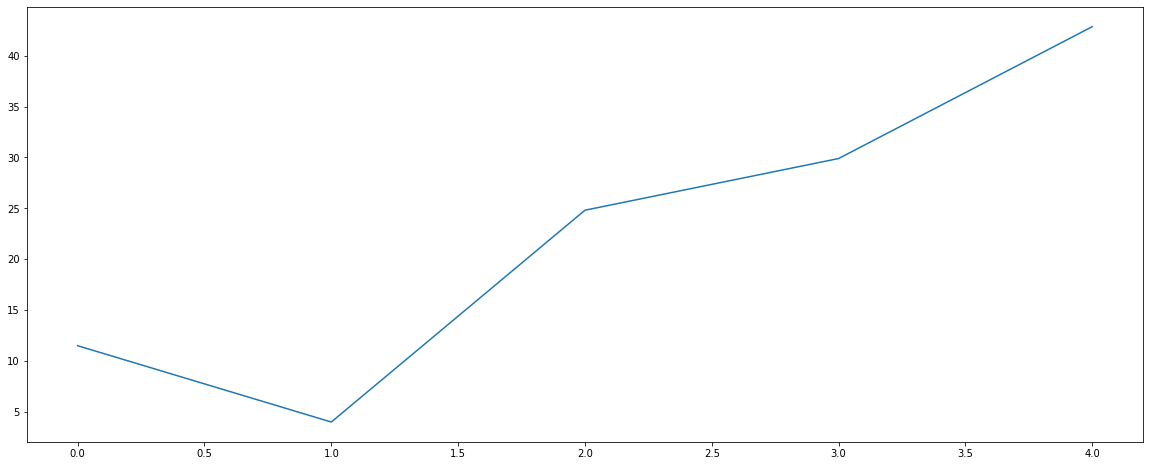

In [44]:
df10['Profit/Loss_Percentage'].plot(figsize = (20,8))

# **Suggest best performing Year**

From the above data it is observed that 2017 performed best. It has a profit 40.47%



## **Segregate the Profit and Loss Year wise and Day wise**



1.   It is observed that 2015 had a loss of 10.3% and 2016, 2017, 2018 and 2019 are in profits

